# Работа с курсовым проектом 03

In [31]:
import warnings

warnings.filterwarnings('ignore')

In [32]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import mode
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [33]:
df = pd.read_csv('train.csv')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

# Анализ данных и работа с пропусками

### 1. Заполните пропущенные значения в датасете медианами или модами.

In [35]:
medians = df[['LifeSquare', 'Healthcare_1']].median()
medians

LifeSquare       32.78126
Healthcare_1    900.00000
dtype: float64

In [36]:
df[['LifeSquare', 'Healthcare_1']] = df[['LifeSquare', 'Healthcare_1']].fillna(medians)

In [37]:
df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

### 2. Переведите строковый признак в числовое представление.

In [38]:
X = df.drop(['Price', 'Id'], axis=1)
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Healthcare_1   10000 non-null  float64
 13  Helthcare_2    10000 non-null  int64  
 14  Shops_1        10000 non-null  int64  
 15  Ecology_2_A    10000 non-null  uint8  
 16  Ecology_2_B    10000 non-null  uint8  
 17  Ecology_3_A    10000 non-null  uint8  
 18  Ecology

In [39]:
y = pd.Series(df.Price)
y

0       305018.871089
1       177734.553407
2       282078.720850
3       168106.007630
4       343995.102962
            ...      
9995    119367.455796
9996    199715.148807
9997    165953.912580
9998    171842.411855
9999    177685.627486
Name: Price, Length: 10000, dtype: float64

### 3. Разбейте датасет из train.csv на обучающий и валидационный наборы данных.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

### 4. Обучите линейную модель. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
y_valid_pred = lr.predict(X_valid)

Предсказания на валидационных данных

In [46]:
r2(y_valid, y_valid_pred)

0.4693880064503031

Предсказания на тренировочных данных

In [47]:
y_train_pred = lr.predict(X_train)

In [48]:
r2(y_train, y_train_pred)

0.48992596787445397

Выводы: точность предсказания модели на валидационных данных чуть ниже чем на тренировочных. Низкая точнось модели (обученной на тренировочных данных) при проверке на тренировочных данных, говорит о плохом качестве данных в целом.

### 5. Обучите более сложную модель на ваш выбор. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.
### 6. Подберите оптимальные гиперпараметры для вашей модели. Пытайтесь улучшить её качество на двух наборах данных.

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig('report.png')
    plt.show()

In [50]:
parameters = [{
    'n_estimators': [100, 150, 200],
    'max_features': np.arange(10, 21),
    'max_depth': np.arange(9, 12),
}]

clf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=parameters,
    scoring='r2',
    cv=5,
    n_jobs=-1,
)

In [51]:
%%time
clf.fit(X_train, y_train)

Wall time: 3min 9s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': array([ 9, 10, 11]),
                          'max_features': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                          'n_estimators': [100, 150, 200]}],
             scoring='r2')

In [52]:
clf.best_params_

{'max_depth': 11, 'max_features': 11, 'n_estimators': 200}

R2:	0.875
RMSE:	32561.838
MSE:	1060273297.973


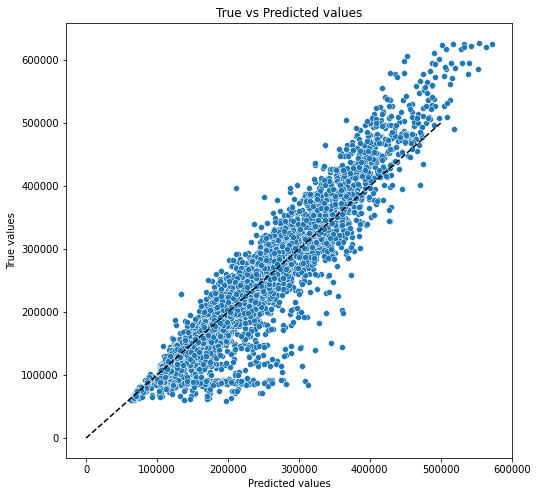

In [53]:
y_train_pred_RF = clf.predict(X_train)
evaluate_preds(y_train, y_train_pred_RF)

R2:	0.734
RMSE:	49255.511
MSE:	2426105373.067


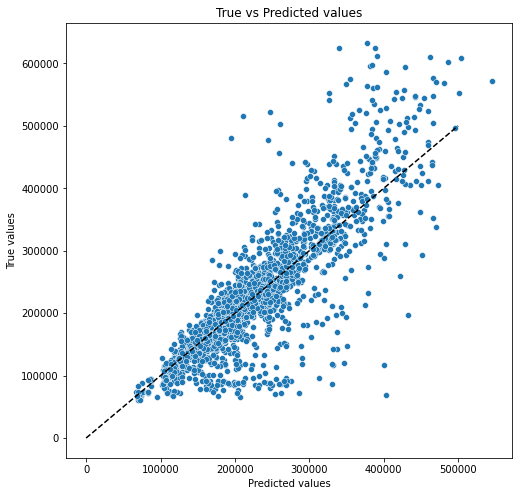

In [54]:
y_valid_pred_RF = clf.predict(X_valid)
evaluate_preds(y_valid, y_valid_pred_RF)

In [55]:
clf_optim = RandomForestRegressor(criterion='mse',
                                 max_depth=11, # глубина дерева  
                                 min_samples_leaf=10, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 max_features=11,
                                 n_estimators=200,  # кол-во деревьев
                                 #n_jobs=-1,
                                 )
clf_optim.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=11, min_samples_leaf=10,
                      n_estimators=200, random_state=42)

R2:	0.788
RMSE:	42297.635
MSE:	1789089901.712


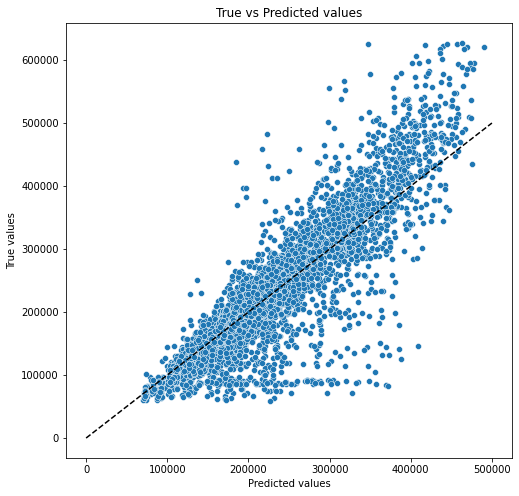

In [56]:
y_train_pred_RF = clf_optim.predict(X_train)
evaluate_preds(y_train, y_train_pred_RF)

R2:	0.722
RMSE:	50418.195
MSE:	2541994414.274


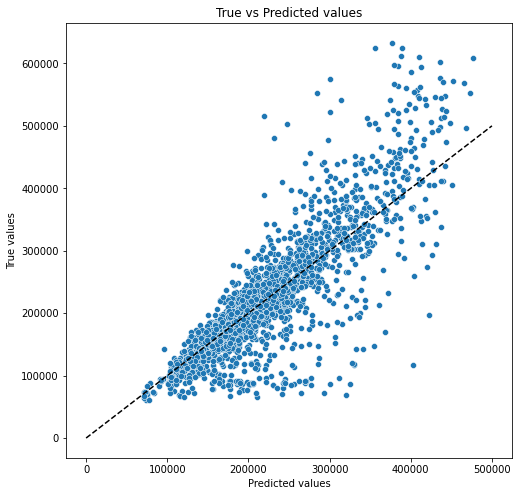

In [57]:
y_valid_pred_RF = clf_optim.predict(X_valid)
evaluate_preds(y_valid, y_valid_pred_RF)

In [58]:
clf_optim = RandomForestRegressor(criterion='mse',
                                 max_depth=11, # глубина дерева  
                                 min_samples_leaf=10, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 max_features=11,
                                 n_estimators=150,  # кол-во деревьев
                                 #n_jobs=-1,
                                 )
clf_optim.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=11, min_samples_leaf=10,
                      n_estimators=150, random_state=42)

Точность предсказания на данных валидации около 0,722, на тренинговых данных 0,788 - что говорит о небольшом переобучении модели.
Случайный лес дает неплохую точность для сырых данных (не убраны выбросы)